In [1]:
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division

In [2]:
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset

In [3]:
import pandas as pd
import glob

In [4]:
video_df = pd.read_csv('../../input/youtube_faces_with_keypoints_large.csv')
video_df.head()

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0


In [5]:
# create a dictionary that maps videoIDs to full file paths
npz_files_full_path = glob.glob('../../input/youtube_faces_*/*.npz')
video_ids = [x.split('/')[-1].split('.')[0] for x in npz_files_full_path]

full_paths = {}
for video_id, full_path in zip(video_ids, npz_files_full_path):
    full_paths[video_id] = full_path

# remove from the large csv file all videos that weren't uploaded yet
video_df = video_df.loc[video_df.loc[:,'videoID'].isin(full_paths.keys()),:].reset_index(drop=True)
print('Number of Videos uploaded so far is %d' %(video_df.shape[0]))
print('Number of Unique Individuals so far is %d' %(len(video_df['personName'].unique())))

Number of Videos uploaded so far is 1293
Number of Unique Individuals so far is 374


# Extracting Features

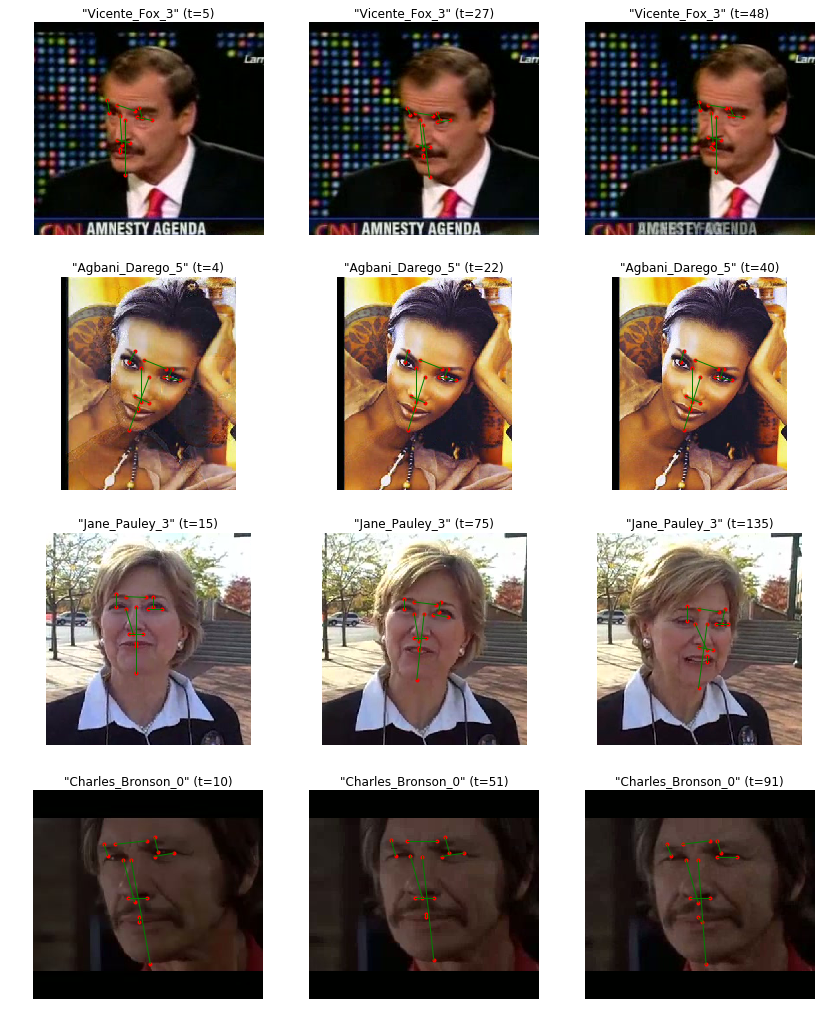

In [68]:
# show several frames from each video and overlay measures
np.random.seed(10)
num_videos = 4
frames_to_show_from_video = np.array([0.1,0.5,0.9])
num_frames_per_video = len(frames_to_show_from_video)

# define measures to be taken

vertical_dim       = [8,27]
upper_lip          = [51,62]
right_eye_width    = [33,39]
left_eye_width     = [42,45]
nose_width         = [31,35]
right_eye_eyebrow  = [19,37]
left_eye_eyebrow   = [23,43]
eyebrowns_distance = [21,22]

list_of_all_measures = [vertical_dim,upper_lip,right_eye_width,
                        left_eye_width,nose_width,
                        right_eye_eyebrow,left_eye_eyebrow,
                        eyebrowns_distance]

# select a random subset of 'num_videos' from the available videos
rand_videos_id = video_df.loc[np.random.choice(video_df.index,size=num_videos,replace=False),'videoID']

fig, ax_array = plt.subplots(nrows=num_videos,ncols=num_frames_per_video,figsize=(14,18))
for i, video_id in enumerate(rand_videos_id):
    # load video
    video_file = np.load(full_paths[video_id])
    color_images = video_file['colorImages']
    bounding_box = video_file['boundingBox']
    landmarks2D = video_file['landmarks2D']
    landmarks3D = video_file['landmarks3D']

     # select frames and show their content
    selected_frames = (frames_to_show_from_video*(color_images.shape[3]-1)).astype(int)
    for j, frame_idx in enumerate(selected_frames):
        ax_array[i][j].imshow(color_images[:,:,:,frame_idx])        
        for con_pts in list_of_all_measures:
            x_pts = landmarks2D[con_pts,0,frame_idx]
            y_pts = landmarks2D[con_pts,1,frame_idx]
            ax_array[i][j].scatter(x=landmarks2D[con_pts,0,frame_idx],
                                   y=landmarks2D[con_pts,1,frame_idx],
                                   s=9,c='r')                        
            ax_array[i][j].plot(x_pts,y_pts,c='g',lw=1)
        ax_array[i][j].set_title('"%s" (t=%d)' %(video_id,frame_idx), fontsize=12)
        ax_array[i][j].set_axis_off()

plt.show()


In [67]:
x_pts, y_pts, con_pts, landmarks2D[21, 1, 9]

(array([ 112.,  143.]), array([ 62.,  58.]), [21, 22], 62.0)